In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture

from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pydvl.value import compute_data_oob
from pydvl.utils import Dataset, Utility, Scorer
from pydvl.reporting.scores import compute_removal_score
from pydvl.reporting.plots import shaded_mean_std, plot_best_worst, plot_best_worst_class_imbalance, compute_best_worst_scores, plot_methods_linreg
from pydvl.value.result import ValuationResult

import pandas as pd

import random
from tqdm import tqdm
# synthcity absolute

import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
data = Dataset.from_sklearn(load_iris())

In [3]:


#model = KNeighborsClassifier(n_neighbors=5)
#model = DecisionTreeClassifier(max_depth=5,)
#model = LogisticRegression()
model = GaussianMixture
#model = Plugins().get("ctgan")

utility = Utility(model, data, Scorer("accuracy", default=0.0))

In [4]:
from pydvl.value.oob.oob import compute_data_oob_generative

# Test values

In [5]:
ad_dict={"model":IsolationForest, "kwargs":{"contamination":0.1}}
ad_dict["kwargs"]

{'contamination': 0.1}

In [6]:
oob_values = compute_data_oob_generative(utility, progress=True, max_samples=0.8, n_est=30, eval_alg="custom", ad_dict=ad_dict)

  3%|▎         | 1/30 [00:01<00:33,  1.17s/it]

100%|██████████| 30/30 [00:32<00:00,  1.09s/it]


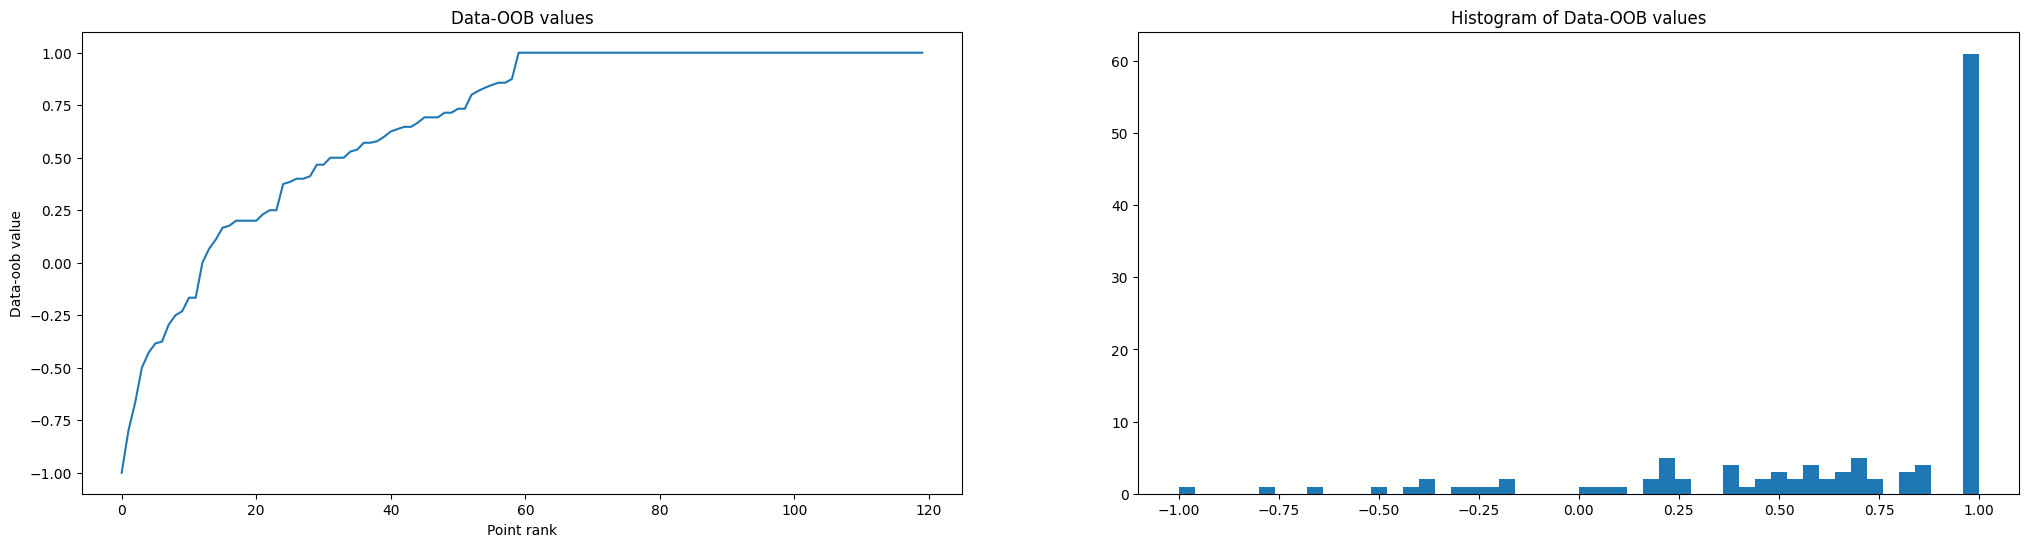

In [8]:
oob_values.sort(key="value")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[25, 6])

ax[0].plot(np.arange(len(oob_values.values)), oob_values.values)
ax[0].set_title("Data-OOB values")
ax[0].set_ylabel("Data-oob value")
ax[0].set_xlabel("Point rank");

ax[1].hist(oob_values.values, bins=50)
ax[1].set_title("Histogram of Data-OOB values");

In [9]:
df = pd.DataFrame(utifrom pydvl.reporting.plots import

SyntaxError: invalid syntax (2997032446.py, line 1)

In [10]:
sns.pairplot(data=df, hue="values", palette="viridis")

NameError: name 'df' is not defined

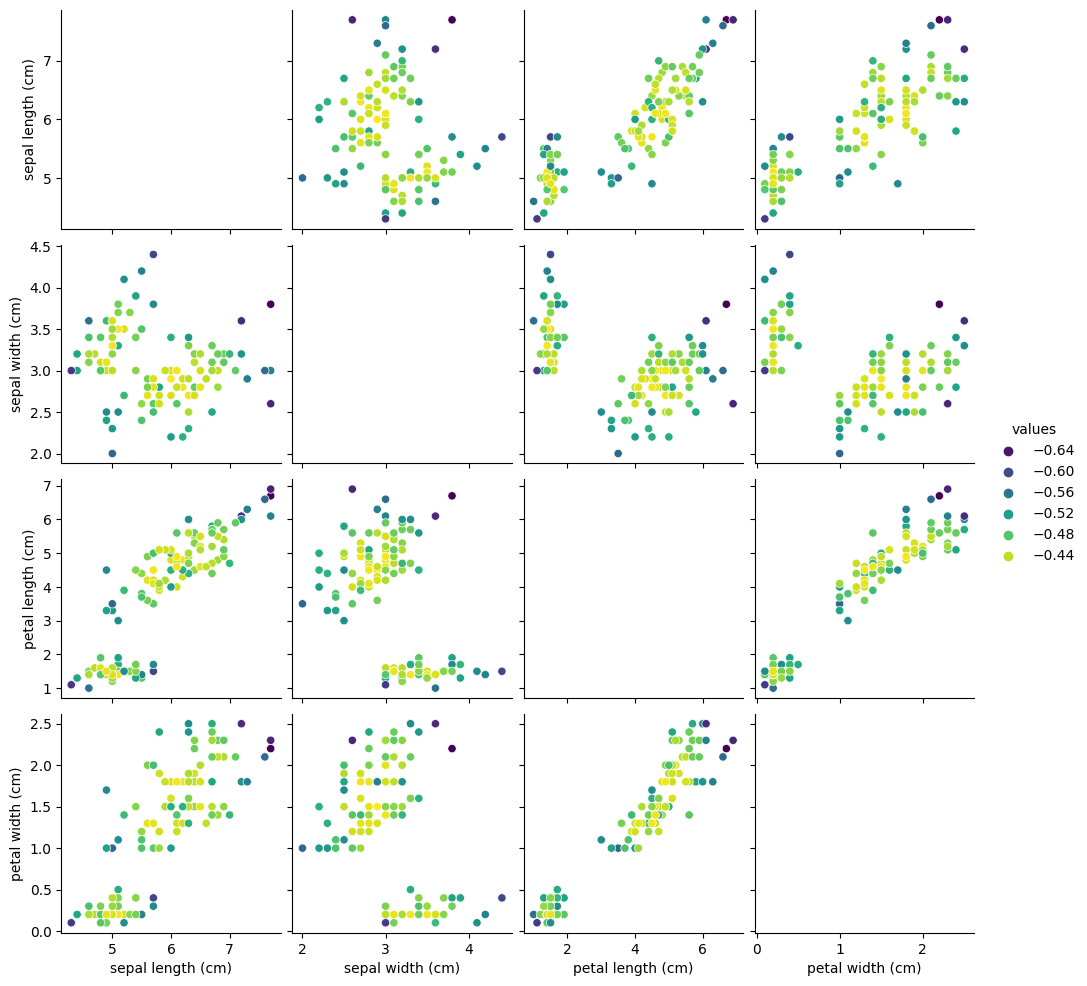

In [ ]:
df = pd.DataFrame(utility.data.x_train, columns=utility.data.feature_names)
df.loc[:,"values"] = IsolationForest().fit(utility.data.x_train).score_samples(utility.data.x_train)
sns.pairplot(data=df, hue="values", palette="viridis")

## Variance

The variance it the weak learner variance. It is computed with Welford's online algorithm.

In [ ]:
plot_list = [(a, b) for a, b in zip(oob_values.values, oob_values.variances)]
plot_list = pd.DataFrame(plot_list).sample(100).sort_values(by=0).values
yerr = [x[1] ** 2 for x in plot_list]

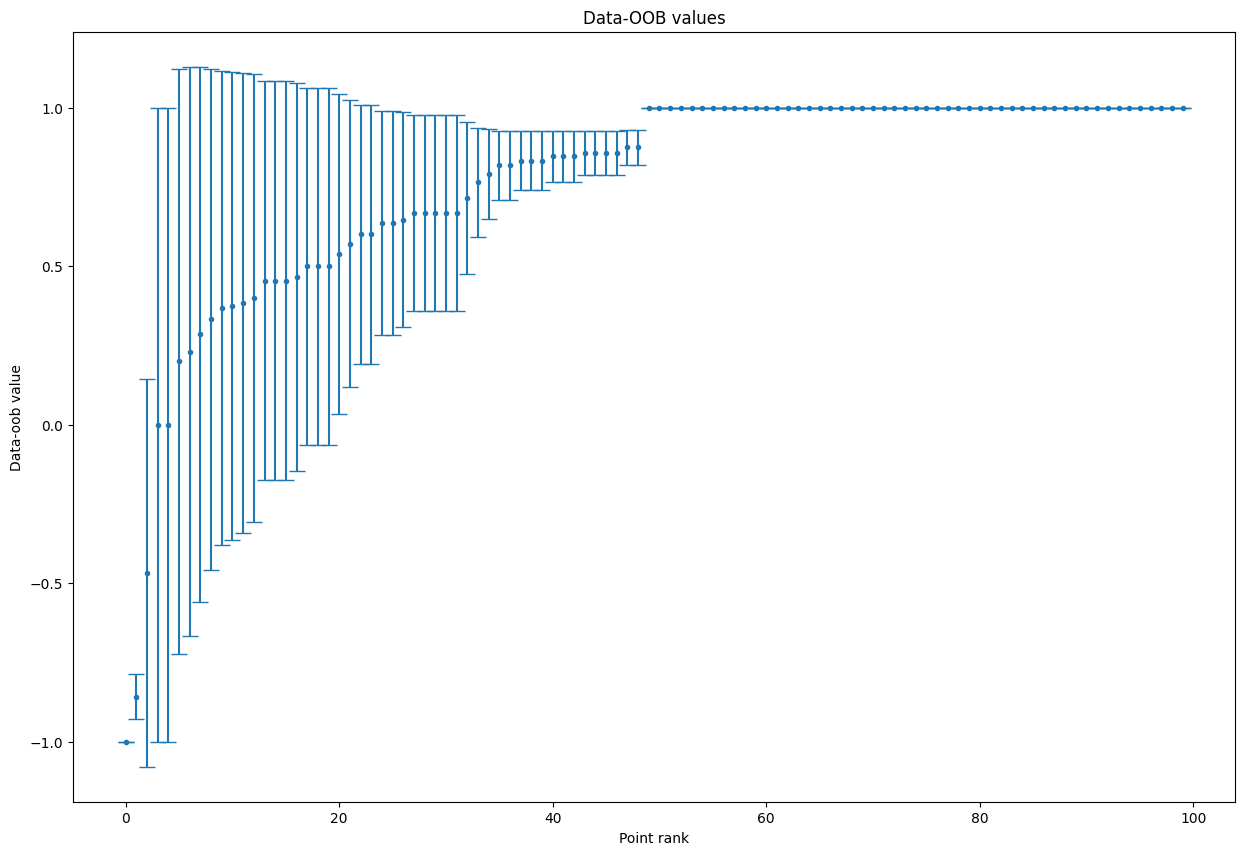

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 10])
ax.errorbar(
    x=np.arange(len(yerr)), y=[x[0] for x in plot_list], yerr=yerr, fmt=".", capsize=6
)
plt.title("Data-OOB values")
ax.set_ylabel("Data-oob value")
ax.set_xlabel("Point rank");

# Test contamination param

In [ ]:
def oob_func(utility, contamination):
    ad_dict={"model":IsolationForest, "kwargs":{"contamination":0.1}}
    return(compute_data_oob_generative(utility, n_est=30, max_samples=0.4, progress=False, ad_dict=ad_dict))
contamination_list = [0.01, 0.05, 0.1,0.3,0.5]
func = oob_func
kwargs_list = [{"contamination":contamination} for contamination in contamination_list]

In [ ]:
model_eval = DecisionTreeClassifier(max_depth=3)
utility_eval = Utility(model_eval, data, Scorer("accuracy", default=0.0))
n_iter = 5
removal_percentages = np.arange(0, 0.99, 0.01)
best_scores_df, worst_scores_df, all_values = compute_best_worst_scores(utility, utility_eval, removal_percentages, n_iter, oob_func, kwargs_list, f_name="oobGen", return_values=True)

100%|██████████| 30/30 [00:00<00:00, 35.62it/s]


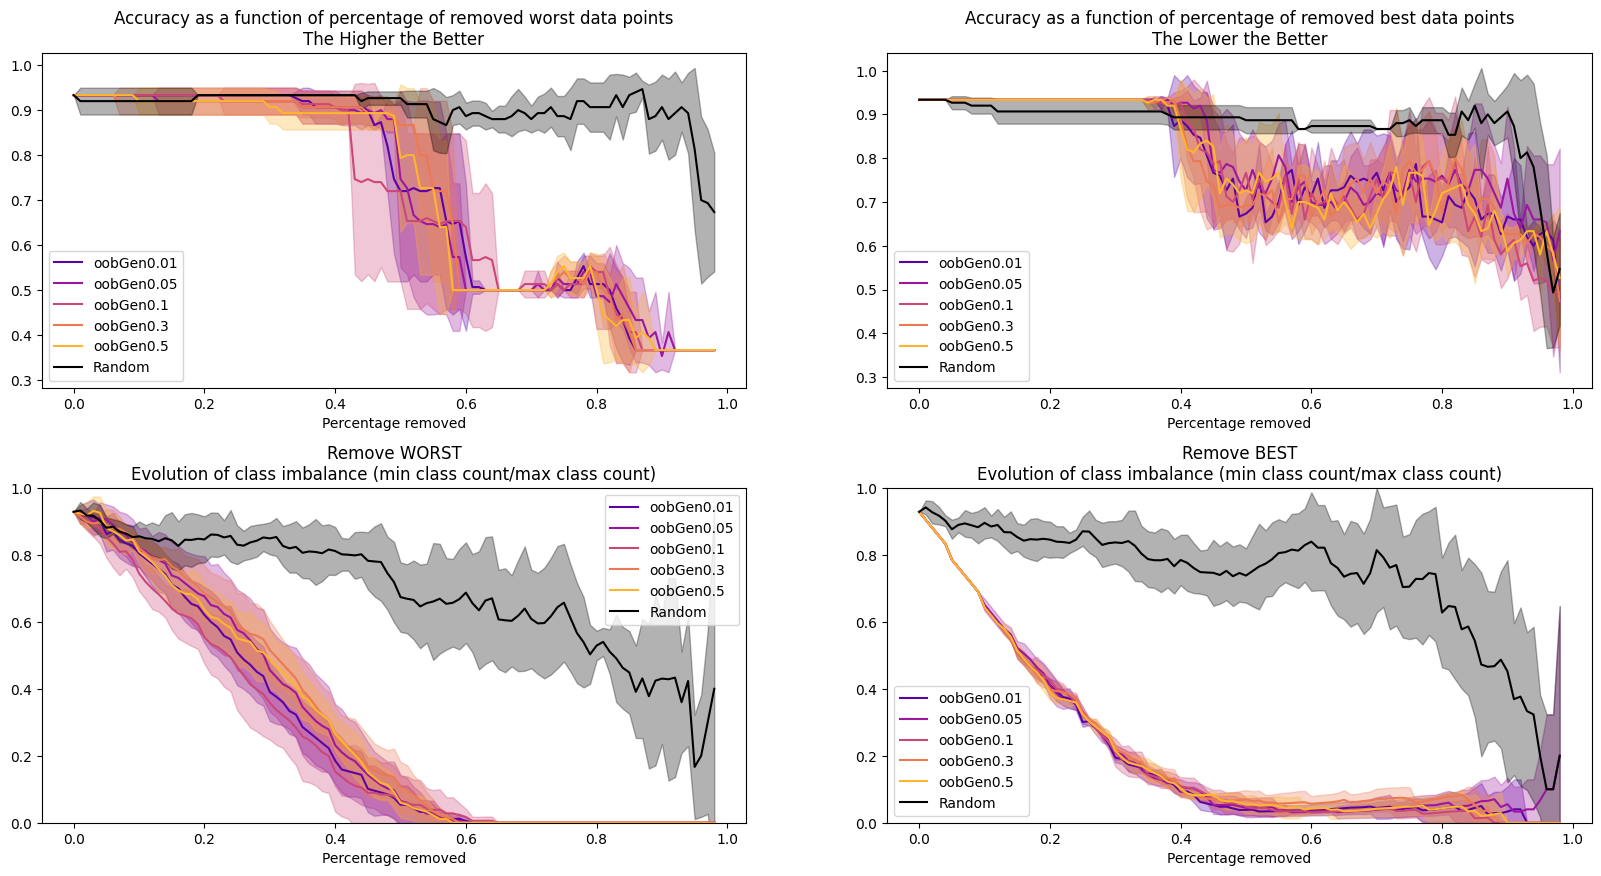

In [ ]:
plot_best_worst_class_imbalance(best_scores_df, worst_scores_df, all_values, utility_eval, palette_name="plasma", random_run=True)

# Point removal

In [ ]:
from pydvl.reporting.plots import compute_best_worst_scores, plot_best_worst_class_imbalance

In [ ]:
def oob_func(utility, n_est):
    return(compute_data_oob_generative(utility, n_est=n_est, max_samples=0.4, progress=False))
n_est_list = [10, 20, 30, 50]
func = oob_func
kwargs_list = [{"n_est":n_est} for n_est in n_est_list]

In [ ]:
model_eval = DecisionTreeClassifier(max_depth=3)
utility_eval = Utility(model_eval, data, Scorer("accuracy", default=0.0))
n_iter = 5
removal_percentages = np.arange(0, 0.99, 0.01)
best_scores_df, worst_scores_df, all_values = compute_best_worst_scores(utility, utility_eval, removal_percentages, n_iter, oob_func, kwargs_list, f_name="oobGen", return_values=True)

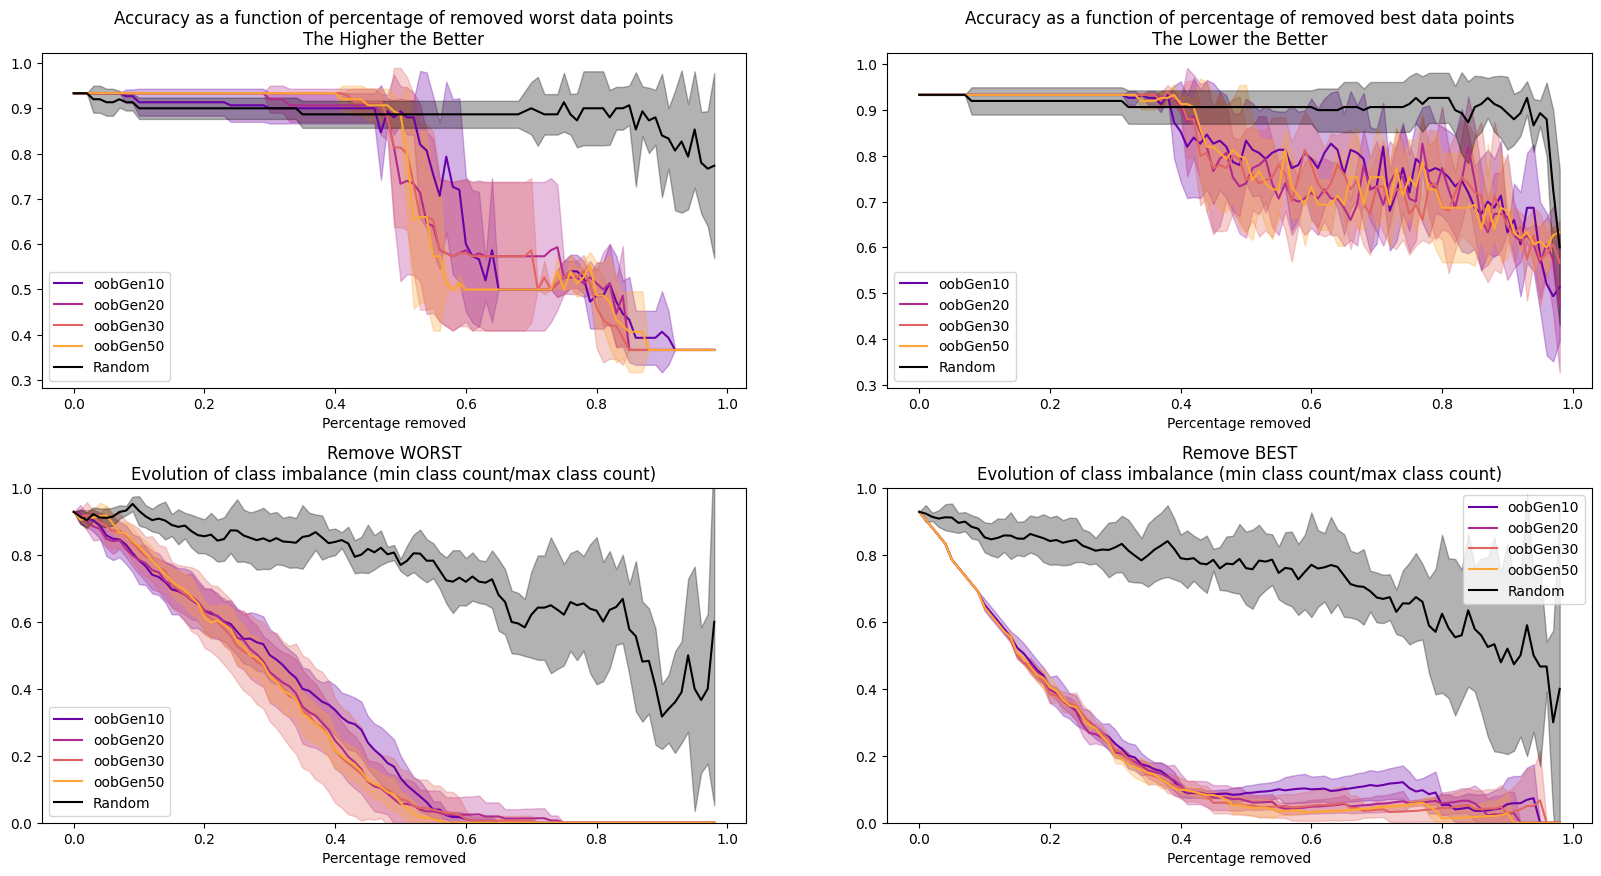

In [ ]:
plot_best_worst_class_imbalance(best_scores_df, worst_scores_df, all_values, utility_eval, palette_name="plasma", random_run=True)

# Eval 

## Removal based metric:

In [11]:
model_class = GaussianMixture
m = model_class()

In [12]:
from sdmetrics.single_table import SVCDetection, CorrelationSimilarity, LogisticDetection, KSComplement, StatisticSimilarity, BoundaryAdherence
from sdv.metrics.tabular import BinaryDecisionTreeClassifier

In [13]:
from pydvl.reporting.scores import compute_gen_scores

In [41]:
from typing import Dict, Iterable, Union

import numpy as np
from numpy.typing import NDArray
import pandas as pd
from sklearn.mixture import GaussianMixture

from pydvl.utils import Utility, maybe_progress
from pydvl.value.result import ValuationResult

def compute_gen_scores(
    u: Utility,
    values: ValuationResult,
    percentages: Union[NDArray[np.float_], Iterable[float]],
    *,
    remove_best: bool = False,
    metric,
    progress: bool = False,
    model_class = GaussianMixture,
    n_iter: int = 1,
) -> Dict[float, float]:
    
    # Sanity checks
    if np.any([x >= 1.0 or x < 0.0 for x in percentages]):
        raise ValueError("All percentages should be in the range [0.0, 1.0)")

    if len(values) != len(u.data.indices):
        raise ValueError(
            f"The number of values, {len(values) }, should be equal to the number of data indices, {len(u.data.indices)}"
        )

    # We sort in descending order if we want to remove the best values
    values.sort(reverse=remove_best)
    all_scores = {pct:[] for pct in percentages}
    for pct in maybe_progress(percentages, display=progress, desc="Removal Scores"):
        n_removal = int(pct * len(u.data))
        indices = values.indices[n_removal:]
        train_data = u.data.x_train[indices]
        gen_model = model_class().fit(train_data)
        for _ in range(n_iter):
            synth_data = gen_model.sample(len(u.data.x_test))[0]
            score = metric.compute(
                                real_data=pd.DataFrame(u.data.x_test, columns = u.data.feature_names),
                                synthetic_data=pd.DataFrame(synth_data, columns = u.data.feature_names),
                            )
            all_scores[pct].append(score)
        
    return pd.DataFrame(all_scores, index =[metric.__name__ for _ in range(n_iter)])


In [53]:
removal_percentages = np.arange(0, 0.99, 0.01)
scores = compute_gen_scores(u=utility, values=oob_values, percentages=removal_percentages, remove_best=True, 
                            metric=SVCDetection, model_class=GaussianMixture, n_iter=2)
scores = scores.reset_index().rename(columns ={"index":"method_name"})
scores.loc[:,"method_name"] = "_Random"

In [58]:
scores = scores.reset_index().rename(columns ={"index":"method_name"})
scores.loc[:,"method_name"] = "_Random"
aa

,method_name,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,...,0.89,0.9,0.91,0.92,0.93,0.9400000000000001,0.9500000000000001,0.96,0.97,0.98
0,_Random,0.940000,0.820000,0.973333,1.0,1.000000,0.986667,0.686667,1.000000,0.993333,...,0.246667,0.713333,0.386667,0.573333,0.766667,0.346667,0.400000,0.226667,0.120000,0.066667
1,_Random,0.746667,0.946667,0.786667,1.0,0.613333,0.590000,0.880000,0.733333,0.953333,...,0.426667,0.293333,0.366667,0.446667,0.576667,0.973333,0.313333,0.280000,0.073333,0.066667


In [50]:

df_scores_best = score_list.dropna().T.reset_index().rename(columns ={"index":"method_name"})

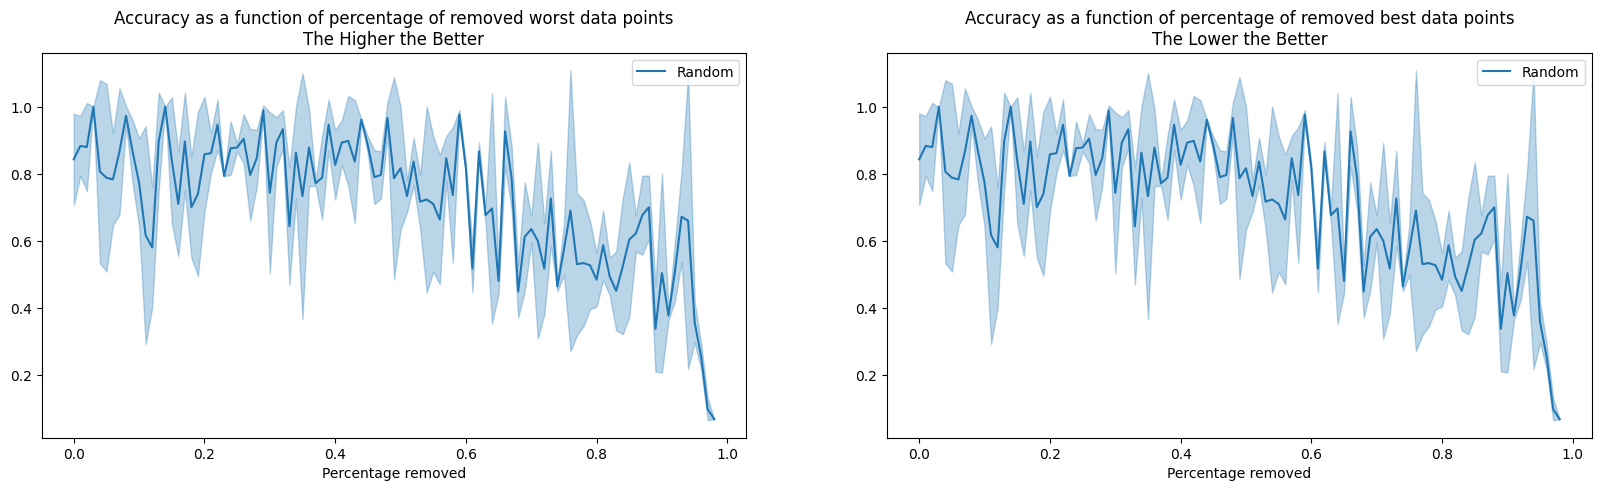

In [59]:
plot_best_worst(aa, aa)

In [85]:
def remove_best_worst_gen(removal_percentages, n_iter, model_class, metric):
    remove_best = True
    scores = compute_gen_scores(u=utility, values=oob_values, percentages=removal_percentages, remove_best=remove_best, 
                                metric=metric, model_class=model_class, n_iter=n_iter)
    df_scores_best = scores.reset_index().rename(columns ={"index":"method_name"})
    scores = compute_gen_scores(u=utility, values=ValuationResult.from_random(size=len(utility.data)), percentages=removal_percentages, remove_best=remove_best, 
                                metric=metric, model_class=model_class, n_iter=n_iter)
    df_scores_best_random = scores.reset_index().rename(columns ={"index":"method_name"})
    df_scores_best_random.loc[:,"method_name"] = "Random"
    df_scores_best = pd.concat((df_scores_best,df_scores_best_random),)
    df_scores_best.loc[:,"method_name"] = df_scores_best.loc[:,"method_name"].apply(lambda x: "_"+x)


    remove_best = False
    scores = compute_gen_scores(u=utility, values=oob_values, percentages=removal_percentages, remove_best=remove_best, 
                                metric=metric, model_class=model_class, n_iter=n_iter)
    df_scores_worst = scores.reset_index().rename(columns ={"index":"method_name"})
    scores = compute_gen_scores(u=utility, values=ValuationResult.from_random(size=len(utility.data)), percentages=removal_percentages, remove_best=remove_best, 
                                metric=metric, model_class=model_class, n_iter=n_iter)
    df_scores_worst_random = scores.reset_index().rename(columns ={"index":"method_name"})
    df_scores_worst_random.loc[:,"method_name"] = "Random"
    df_scores_worst = pd.concat((df_scores_worst, df_scores_worst_random),)
    df_scores_worst.loc[:,"method_name"] = df_scores_worst.loc[:,"method_name"].apply(lambda x: "_"+x)
    return(df_scores_best, df_scores_worst)

In [86]:
removal_percentages = np.arange(0, 0.99, 0.1)
n_iter = 5
metric = StatisticSimilarity#SVCDetection
model_class = GaussianMixture
df_scores_best, df_scores_worst = remove_best_worst_gen(removal_percentages, n_iter, model_class, metric)

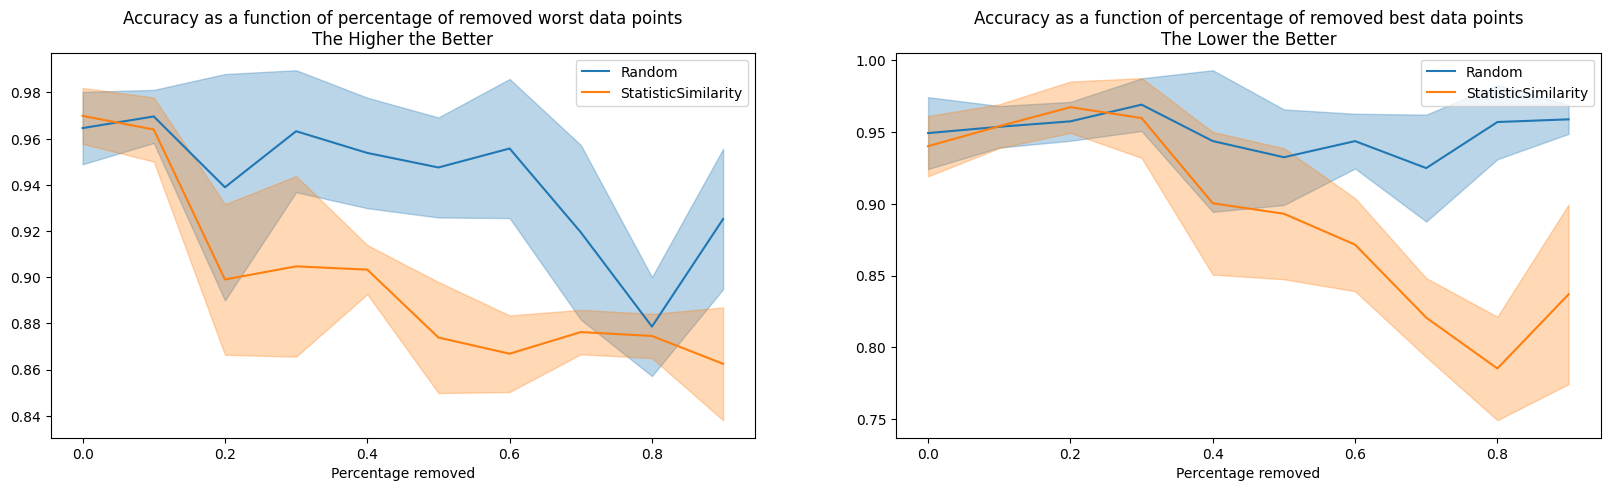

In [87]:
plot_best_worst(df_scores_best, df_scores_worst)

In [90]:
metric_list = [SVCDetection, CorrelationSimilarity, LogisticDetection, KSComplement, StatisticSimilarity, BoundaryAdherence]

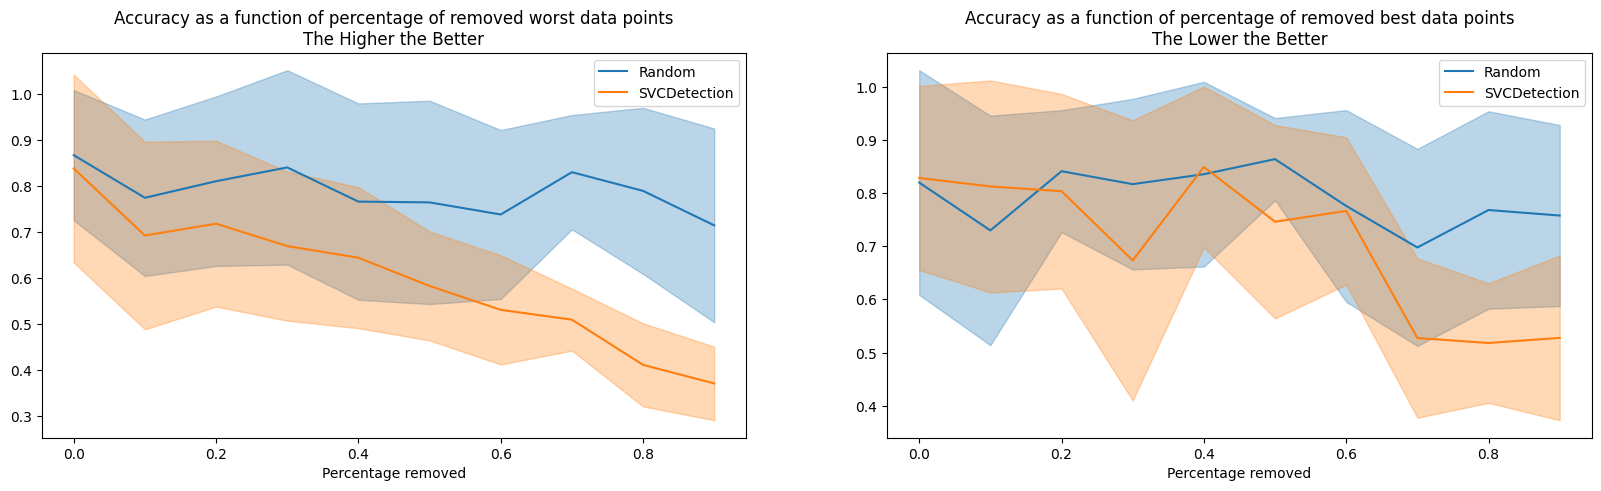

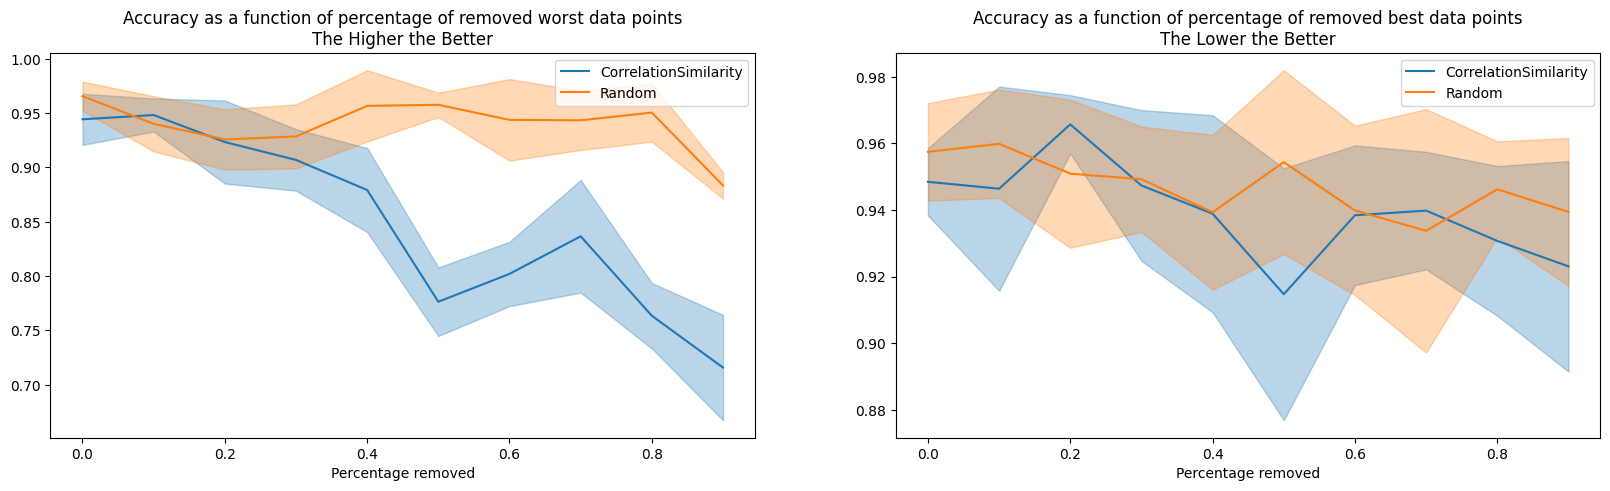

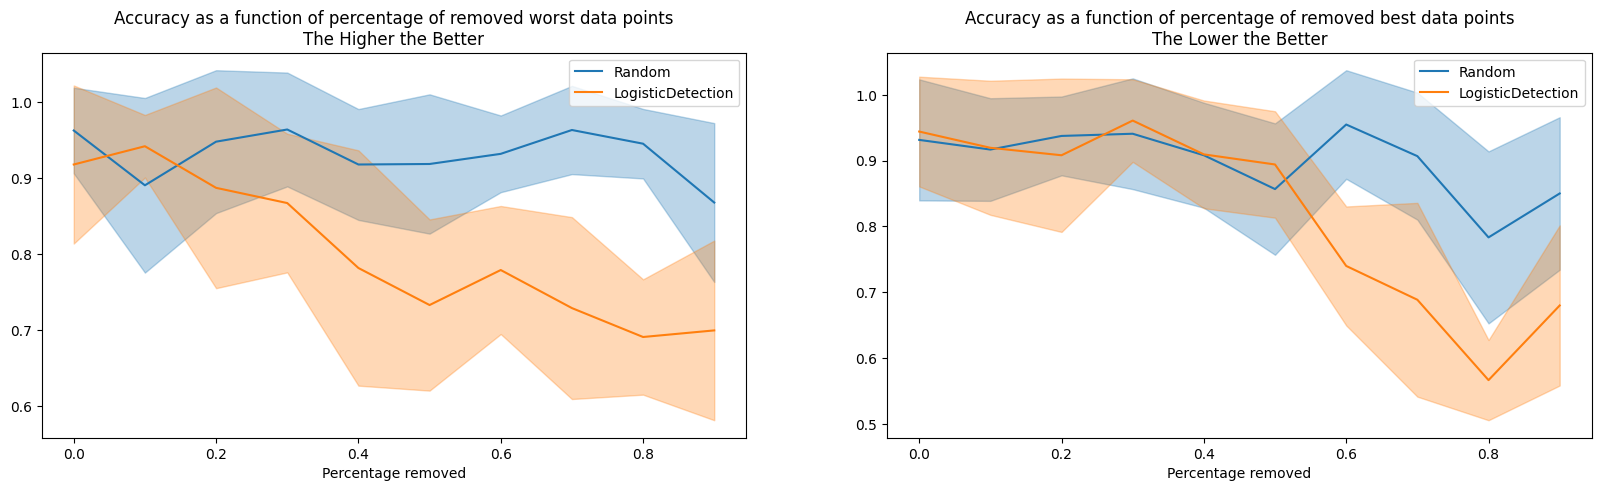

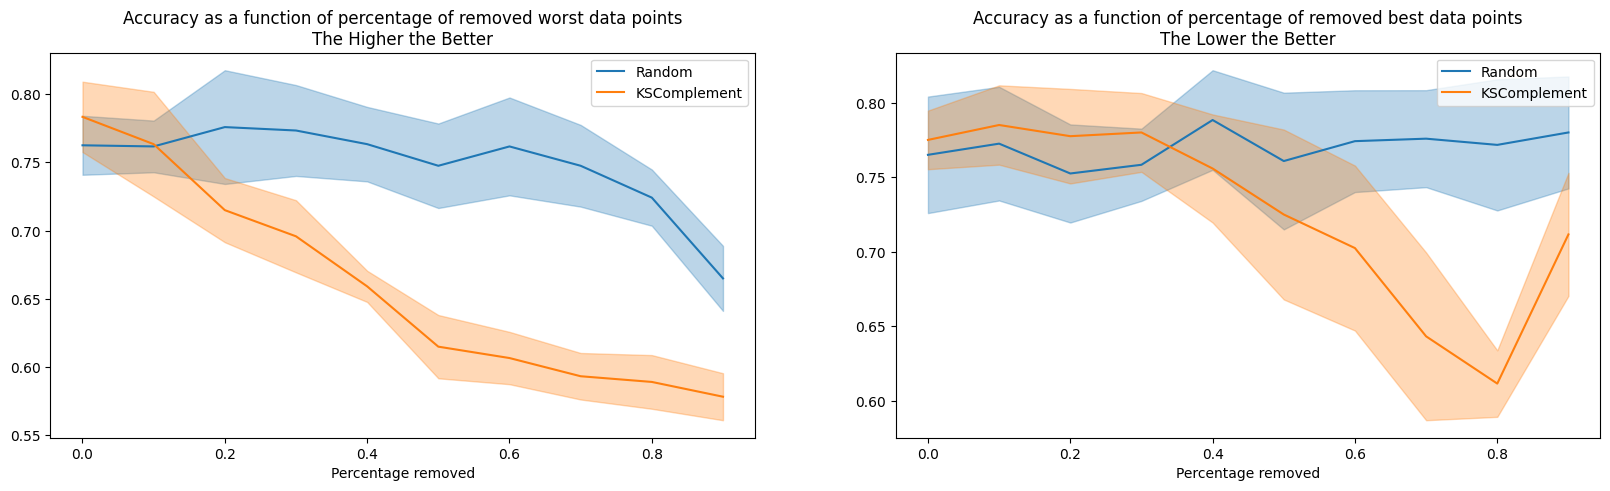

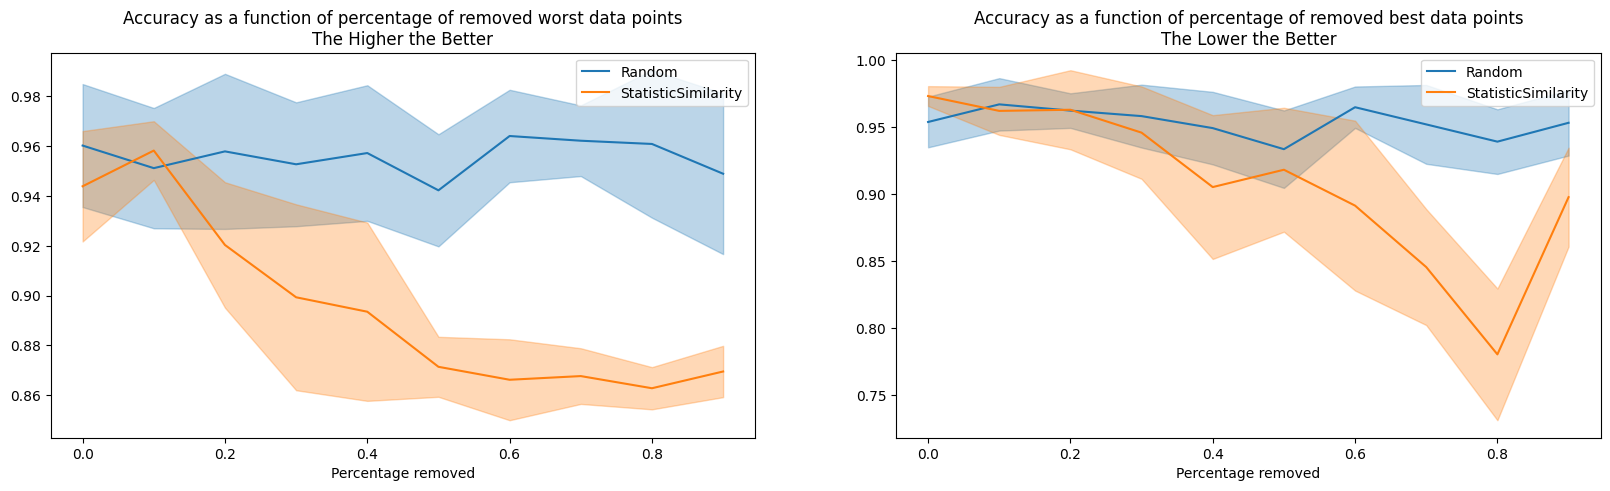

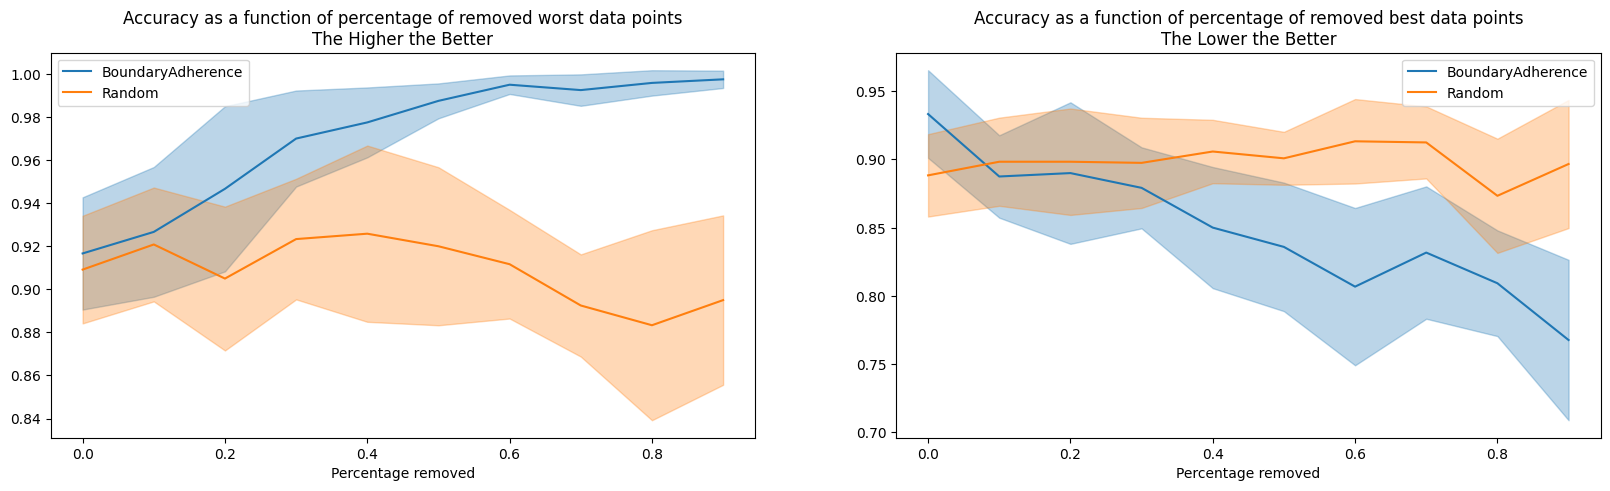

In [91]:
removal_percentages = np.arange(0, 0.99, 0.1)
n_iter = 10
model_class = GaussianMixture

for i,metric in enumerate(metric_list):
    df_scores_best, df_scores_worst = remove_best_worst_gen(removal_percentages, n_iter, model_class, metric)
    plot_best_worst(df_scores_best, df_scores_worst)

### Reverse the order 

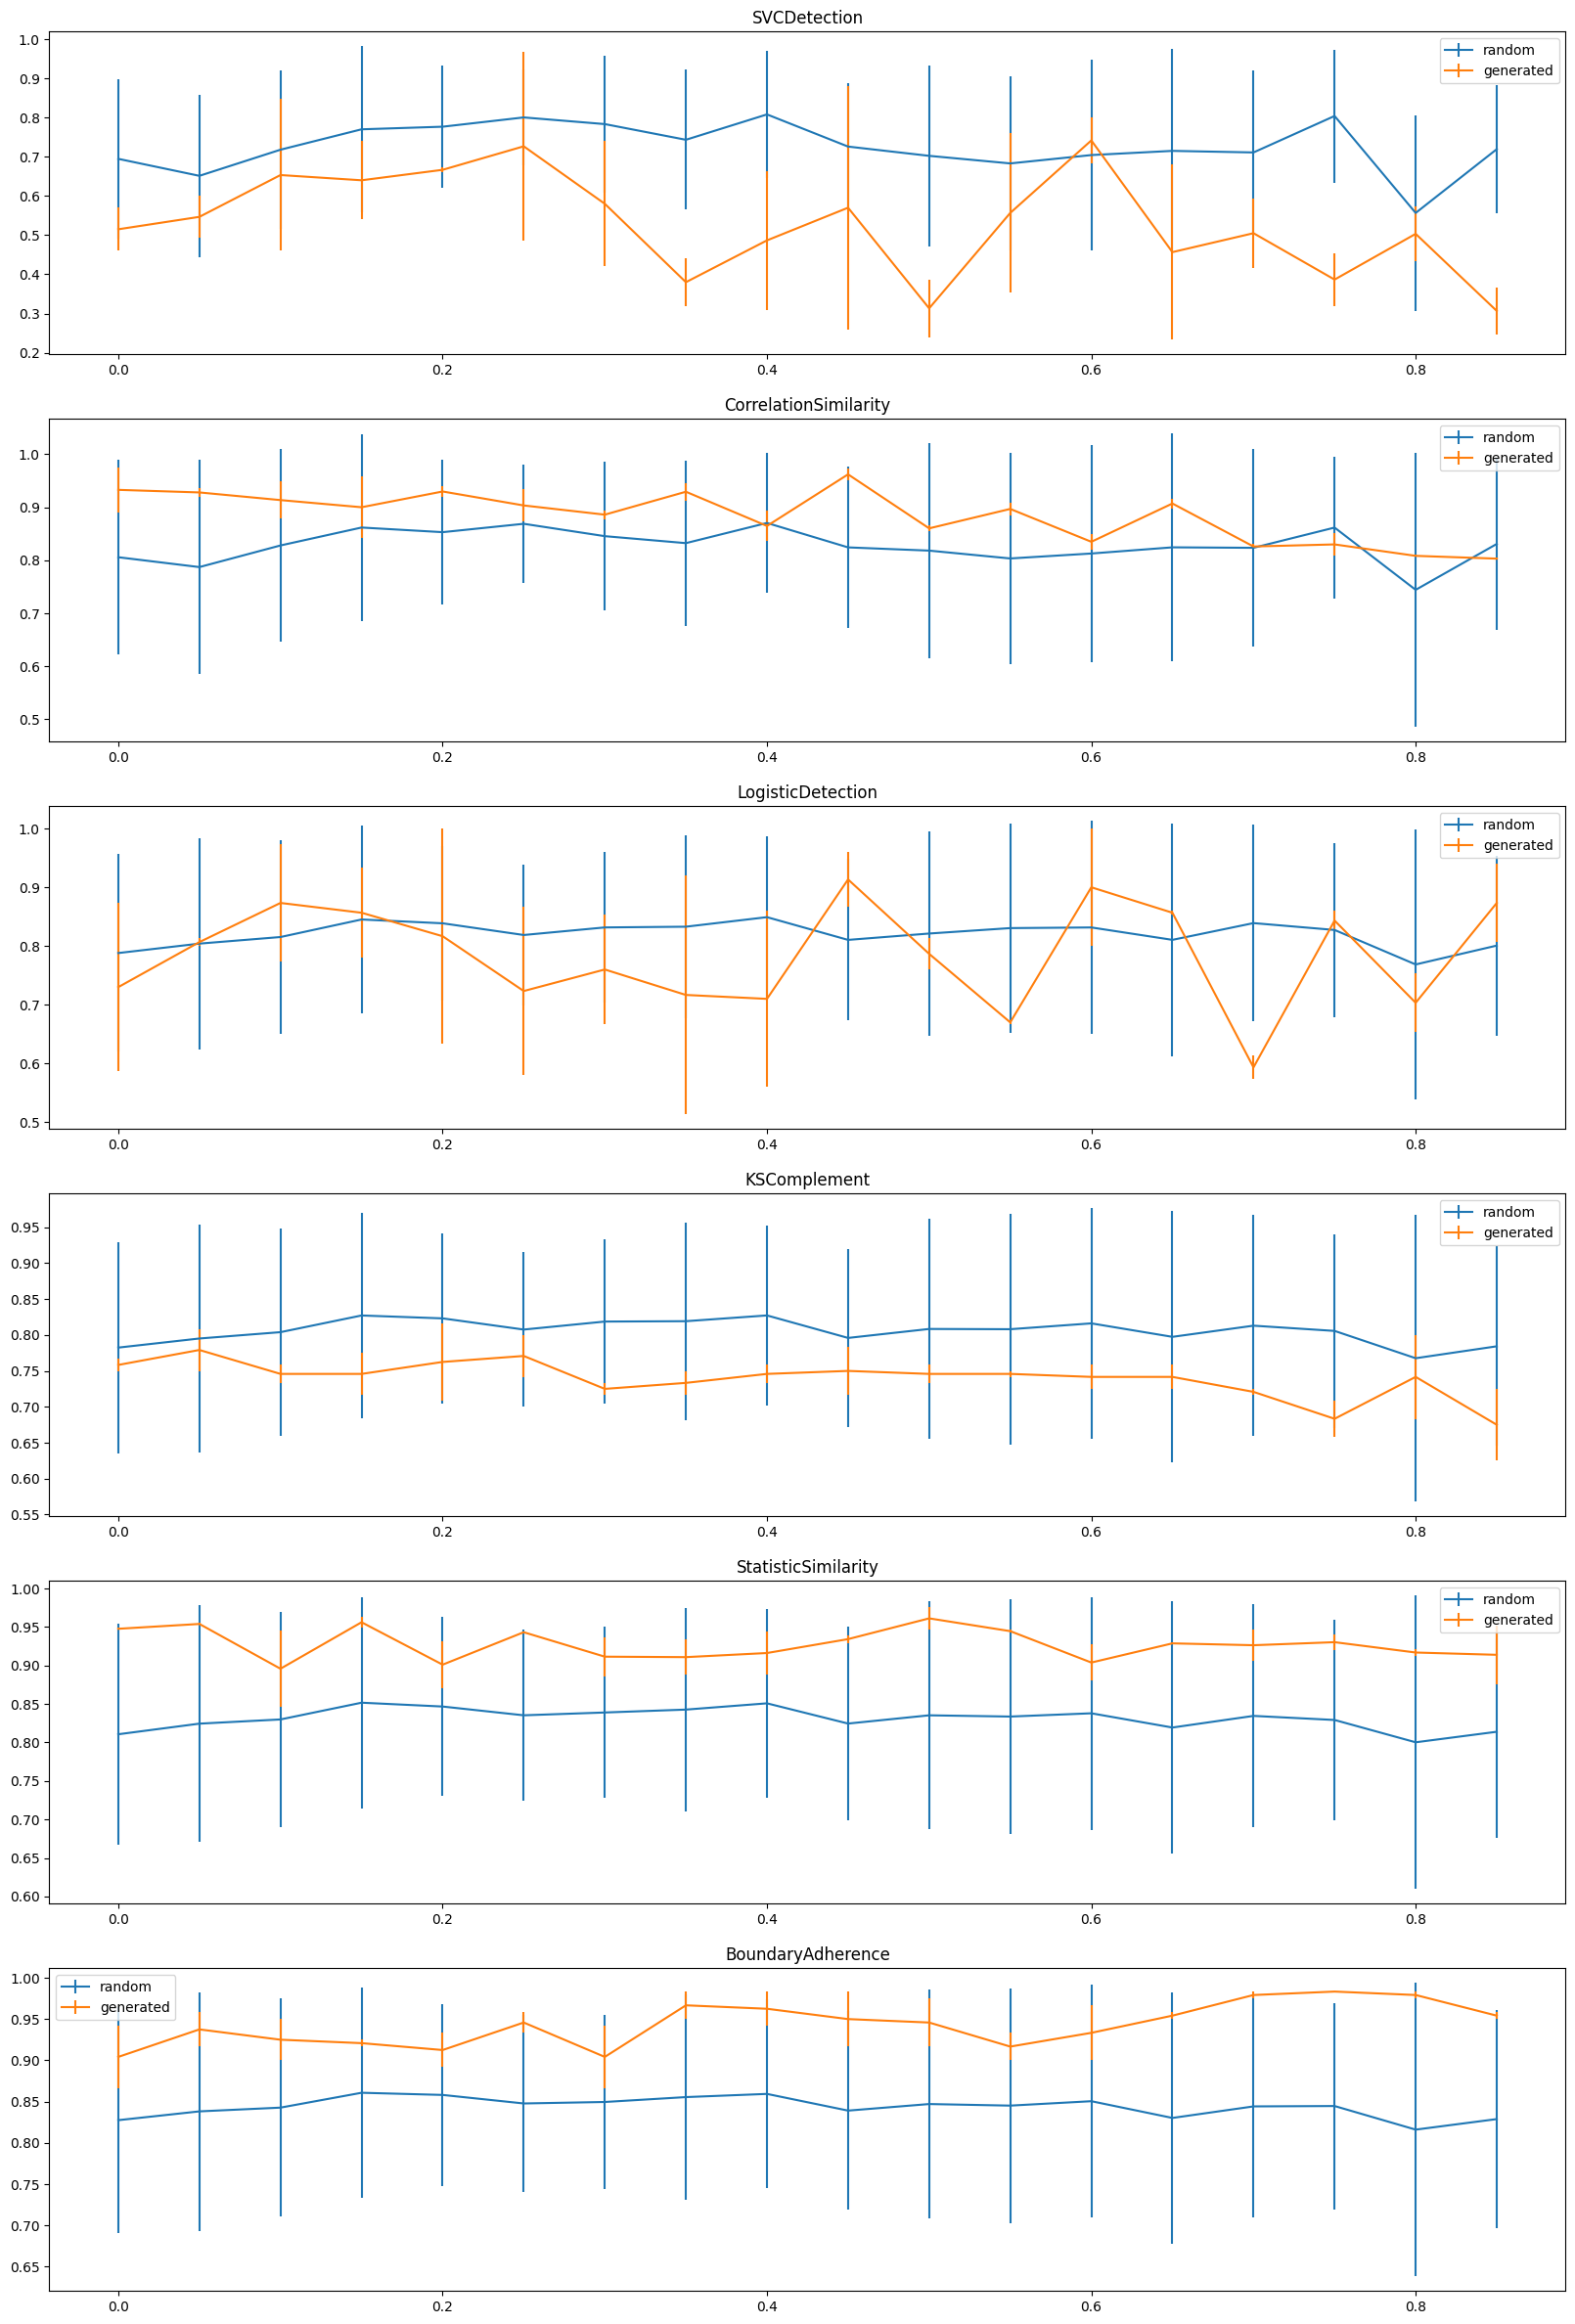

In [ ]:
sorted_df = df.sort_values(ascending=True, by="values").drop(columns = ['values'])

fig, ax = plt.subplots(ncols=1, nrows = len(metric_list), figsize = [20,5*len(metric_list)])

random_score = {pct:[] for pct in percentages}

for i,metric in enumerate(metric_list):
    for pct in percentages:
        for k in range(n_iter_random):
            n_removal = int(pct * len(sorted_df))
            train_data = sorted_df.sample(int(len(sorted_df)-n_removal))#.iloc[n_removal:]
            model = m().fit(train_data)
            gen_data = model.sample(30)[0]
            
            score = metric.compute(
                    real_data=pd.DataFrame(utility.data.x_test, columns = data.feature_names),
                    synthetic_data=pd.DataFrame(gen_data, columns = data.feature_names),
                )
            random_score[pct].append(score)
    
    ax[i].errorbar(x=percentages,y=[np.mean(x) for k,x in random_score.items()],
                        yerr=[np.std(x) for k,x in random_score.items()], label='random')

for i,metric in enumerate(metric_list):
    all_scores = {pct:[] for pct in percentages}
    for pct in percentages:
        n_removal = int(pct * len(sorted_df))
        train_data = sorted_df.iloc[n_removal:]
        model = m().fit(train_data)
        for k in range(n_iter):
            gen_data = model.sample(30)[0]
            score = metric.compute(
                    real_data=pd.DataFrame(utility.data.x_test, columns = data.feature_names),
                    synthetic_data=pd.DataFrame(gen_data, columns = data.feature_names),
                )
            all_scores[pct].append(score)
    ax[i].errorbar(x=percentages,y=[np.mean(x) for k,x in all_scores.items()],
                    yerr=[np.std(x) for k,x in all_scores.items()], label='generated')
    ax[i].set_title(metric.__name__)
    ax[i].legend()
plt.show()

# TODO: CHECK WHY THE START OF RANDOM AND GENERATED ARE NOT EQUAL !!!!

## TWo samples test

## CS TEST

In [ ]:
from sdmetrics.single_column import CSTest

In [ ]:
j=3
CSTest.compute(real_data= utility.data.x_train[:,j], synthetic_data = utility.data.x_test[:,j])

0.0

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sdmetrics.single_table import LogisticDetection

LogisticDetection.compute(
    real_data=pd.DataFrame(utility.data.x_train, columns = data.feature_names),
    synthetic_data=pd.DataFrame(utility.data.x_test, columns = data.feature_names),
)

0.865

## Compare with Loo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sdv.metrics.tabular import CSTest

In [ ]:
all_scores = []
n_tries= 10
for i, x in df.iterrows():
    ov = x[-1]
    mean_score = 0
    for n in range(n_tries):
        train_set = df.drop(columns=['values']).sample(30)
        if(i in train_set.index):
            train_set = train_set.drop(i)
        mean_score += LogisticDetection.compute(
            real_data=train_set,
            synthetic_data=pd.DataFrame(utility.data.x_test, columns = data.feature_names),
        )
        
    all_scores.append(mean_score/n_tries)


In [ ]:
all_scores = []
n_tries= 20
for i, x in df.iterrows():
    ov = x[-1]
    mean_score = 0
    for n in range(n_tries):
        train_set = df.drop(columns=['values']).sample(100)
        if(i in train_set.index):
            train_set = train_set.drop(i)
        label_train_set = utility.data.y_train
        label_train_set = np.array(label_train_set)[train_set.index]
        eval_model = DecisionTreeClassifier().fit(train_set, label_train_set)
        mean_score += eval_model.score(data.x_test, data.y_test)
    all_scores.append(mean_score/n_tries)


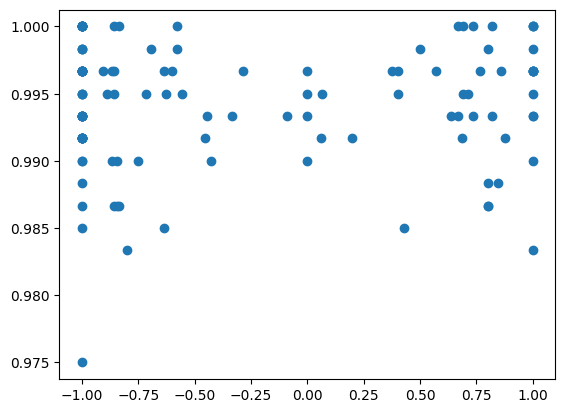

In [ ]:
plt.scatter(df.loc[:,"values"], all_scores)

<Axes: xlabel='values'>

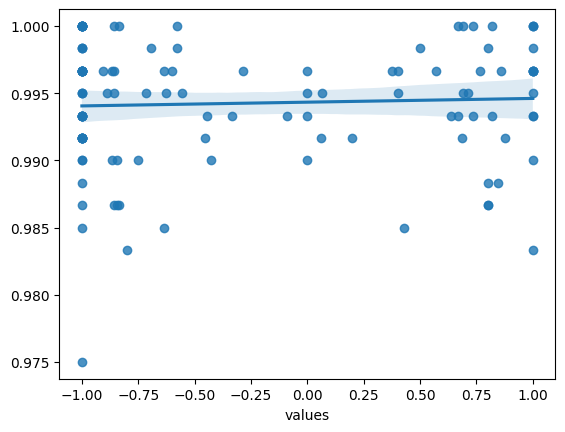

In [ ]:
sns.regplot(x=df.loc[:,"values"], y=all_scores)